# **Edge computational resources and security aware serverless application deployment**

## *In this file, the empirical data gathered from the outputs of the source codes has been used to generate the plots and different approaches are compared with respect to their performances.*

 **Scenario- 1 : Success rate of secure deployment of the
serverless application**

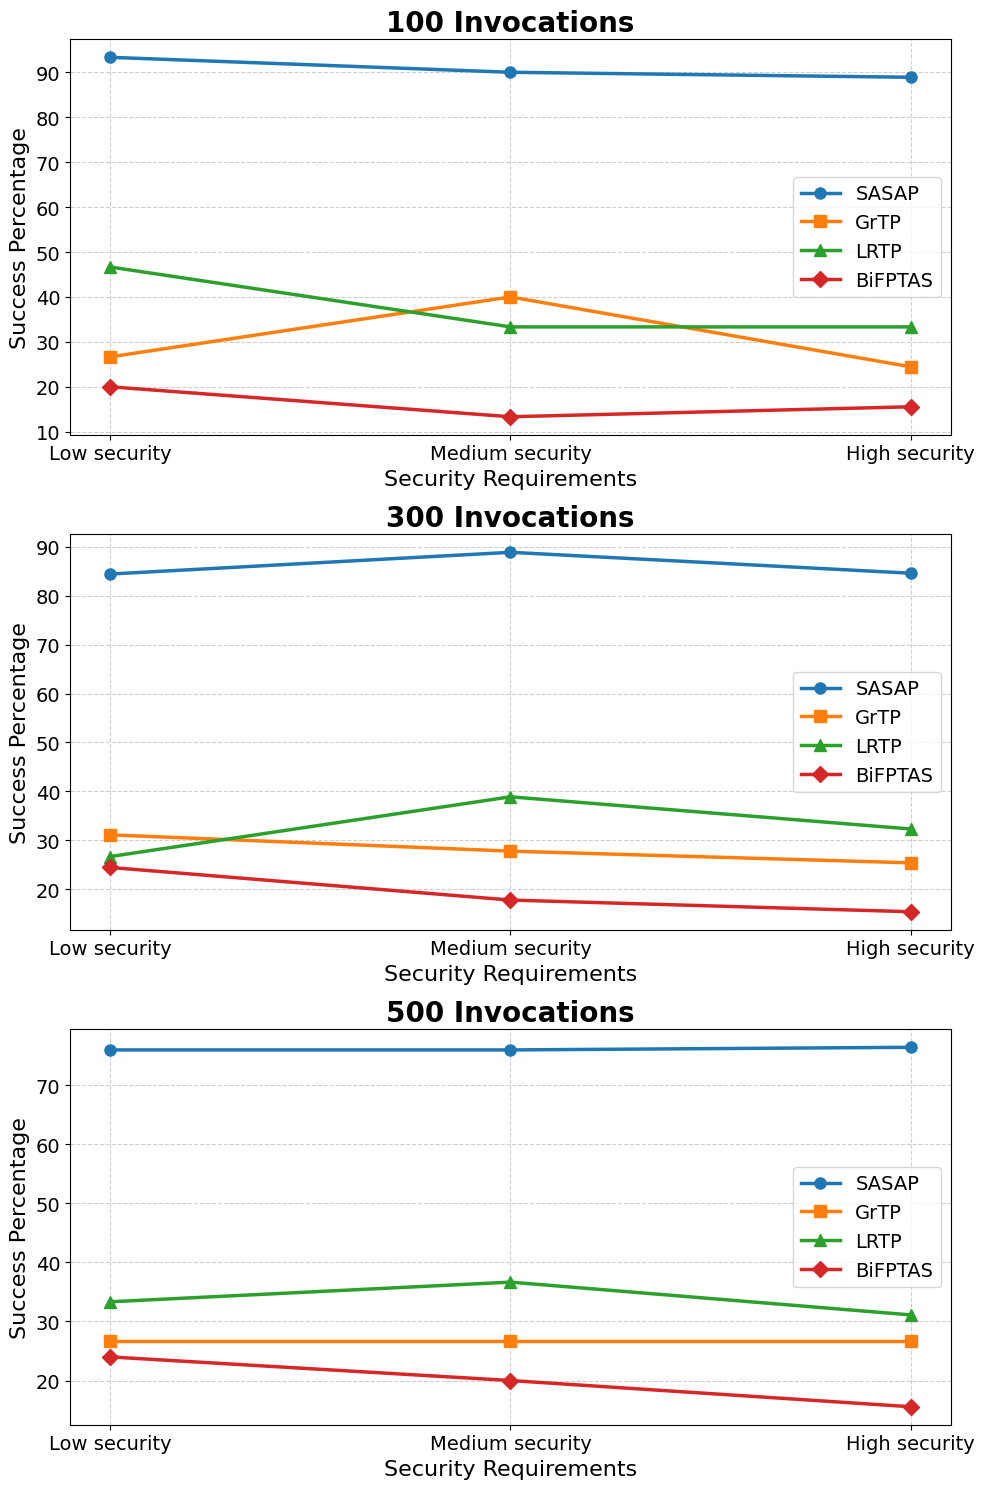

In [1]:
import matplotlib.pyplot as plt
import numpy as np


plt.style.use("seaborn-v0_8-muted")

# Data for different function invocations
data_100 = {
    'SASAP': [14/15, 27/30, 40/45],
    'GrTP': [4/15, 12/30, 11/45],
    'LRTP': [7/15, 10/30, 15/45],
    'BiFPTAS': [3/15, 4/30, 7/45]
}

data_300 = {
    'SASAP': [38/45, 80/90, 110/130],
    'GrTP': [14/45, 25/90, 33/130],
    'LRTP': [12/45, 35/90, 42/130],
    'BiFPTAS': [11/45, 16/90, 20/130]
}

data_500 = {
    'SASAP': [57/75, 114/150, 172/225],
    'GrTP': [20/75, 40/150, 60/225],
    'LRTP': [25/75, 55/150, 70/225],
    'BiFPTAS': [18/75, 30/150, 35/225]
}

# Security levels for X-axis
security_levels = [0.15, 0.30, 0.45]

# Distinct markers and colors for algorithms
markers = {'SASAP': 'o', 'GrTP': 's', 'LRTP': '^', 'BiFPTAS': 'D'}
colors = {'SASAP': '#1f77b4', 'GrTP': '#ff7f0e', 'LRTP': '#2ca02c', 'BiFPTAS': '#d62728'}

# Function to plot the data
def plot_data(data, title, ax):
    for algorithm, values in data.items():
        ax.plot(security_levels, [v * 100 for v in values],
                marker=markers[algorithm], markersize=8,
                linestyle='-', linewidth=2.5, color=colors[algorithm], label=algorithm)

    ax.set_title(title, fontsize=20, fontweight='bold')
    ax.set_xlabel("Security Requirements", fontsize=16)
    ax.set_ylabel("Success Percentage", fontsize=16)
    ax.set_xticks(security_levels)
    ax.set_xticklabels(["Low security", "Medium security", "High security"], fontsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(fontsize=14, loc='best', frameon=True)

# Creating the figures and subplots (3 rows × 1 column)
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

plot_data(data_100, "100 Invocations", axs[0])
plot_data(data_300, "300 Invocations", axs[1])
plot_data(data_500, "500 Invocations", axs[2])

# Layout for better spacing
plt.tight_layout()
plt.show()


**Scenario- 2 : Ensuring serverless application’s
 computational requirements satisfaction**

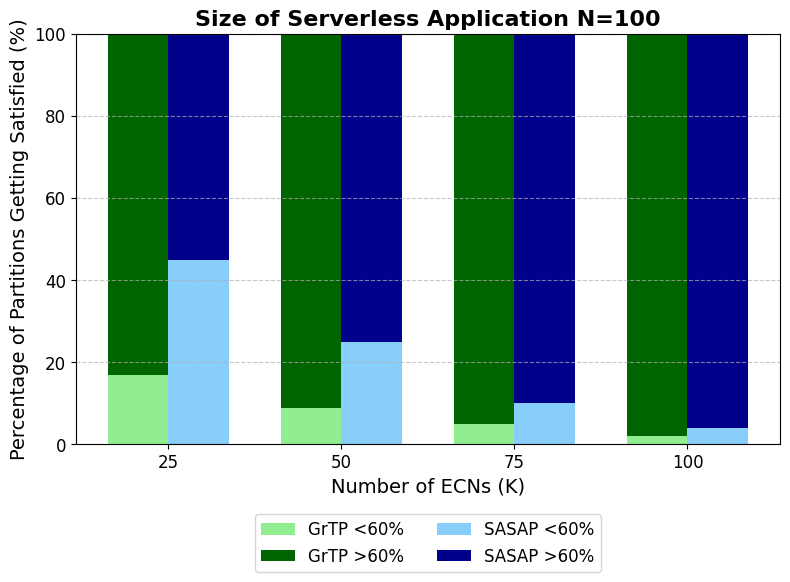

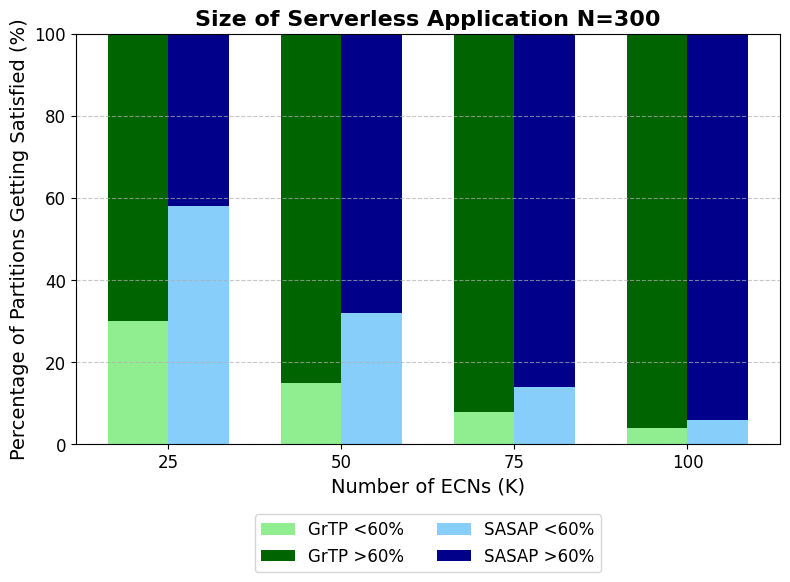

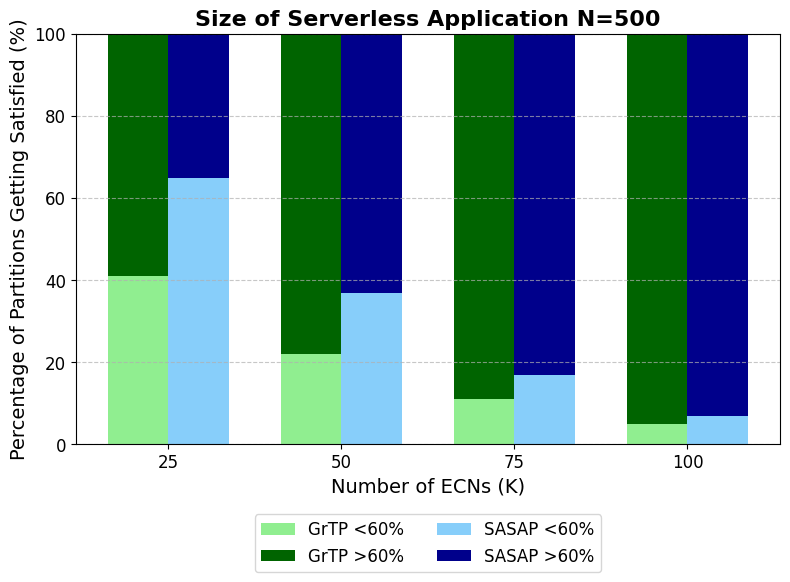

In [2]:
import matplotlib.pyplot as plt
import numpy as np

ecn_counts = [25, 50, 75, 100]

# Empirical data
data = {
    'N=100': {
        'GrTP_>60%': [83, 91, 95, 98],
        'SASAP_>60%': [55, 75, 90, 96],
    },
    'N=300': {
        'GrTP_>60%': [70, 85, 92, 96],
        'SASAP_>60%': [42, 68, 86, 94],
    },
    'N=500': {
        'GrTP_>60%': [59, 78, 89, 95],
        'SASAP_>60%': [35, 63, 83, 93],
    }
}

# Compute < 60%
for vals in data.values():
    vals['GrTP_<60%'] = [100 - x for x in vals['GrTP_>60%']]
    vals['SASAP_<60%'] = [100 - x for x in vals['SASAP_>60%']]

# Plot as stacked bar charts
bar_width = 0.35
index = np.arange(len(ecn_counts))

for N, vals in data.items():
    plt.figure(figsize=(8, 6))

    # Bars for GrTP
    plt.bar(index - bar_width/2, vals['GrTP_<60%'], bar_width,
            label='GrTP <60%', color='#90EE90')
    plt.bar(index - bar_width/2, vals['GrTP_>60%'], bar_width,
            bottom=vals['GrTP_<60%'], label='GrTP >60%', color='#006400')

    # Bars for SASAP
    plt.bar(index + bar_width/2, vals['SASAP_<60%'], bar_width,
            label='SASAP <60%', color='#87CEFA')
    plt.bar(index + bar_width/2, vals['SASAP_>60%'], bar_width,
            bottom=vals['SASAP_<60%'], label='SASAP >60%', color='#00008B')

    plt.title(f'Size of Serverless Application {N}', fontsize=16, weight='bold')
    plt.xlabel('Number of ECNs (K)', fontsize=14)
    plt.ylabel('Percentage of Partitions Getting Satisfied (%)', fontsize=14)
    plt.ylim(0, 100)
    plt.xticks(index, ecn_counts, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

    plt.legend(
        loc='upper center',
        bbox_to_anchor=(0.5, -0.15),
        ncol=2,
        frameon=True,
        fontsize=12
    )

    plt.tight_layout()
    plt.show()


**Scenario- 3 : Ensuring fairness in ECN utilization**

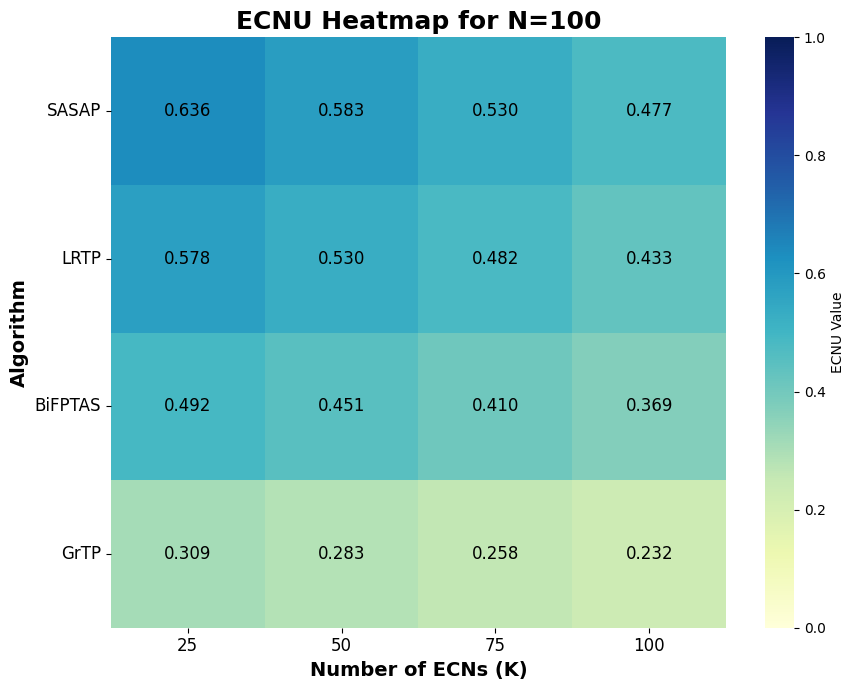

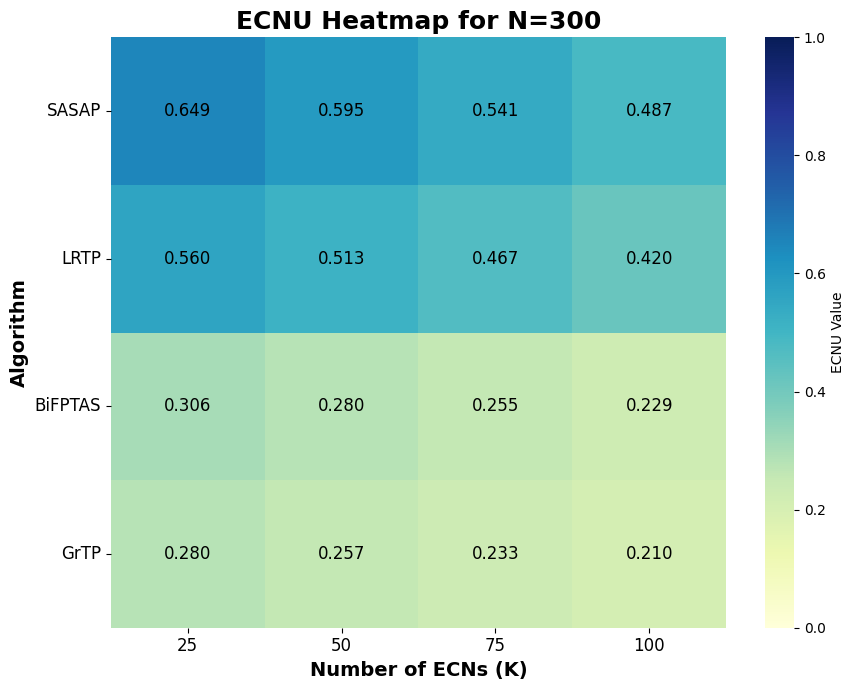

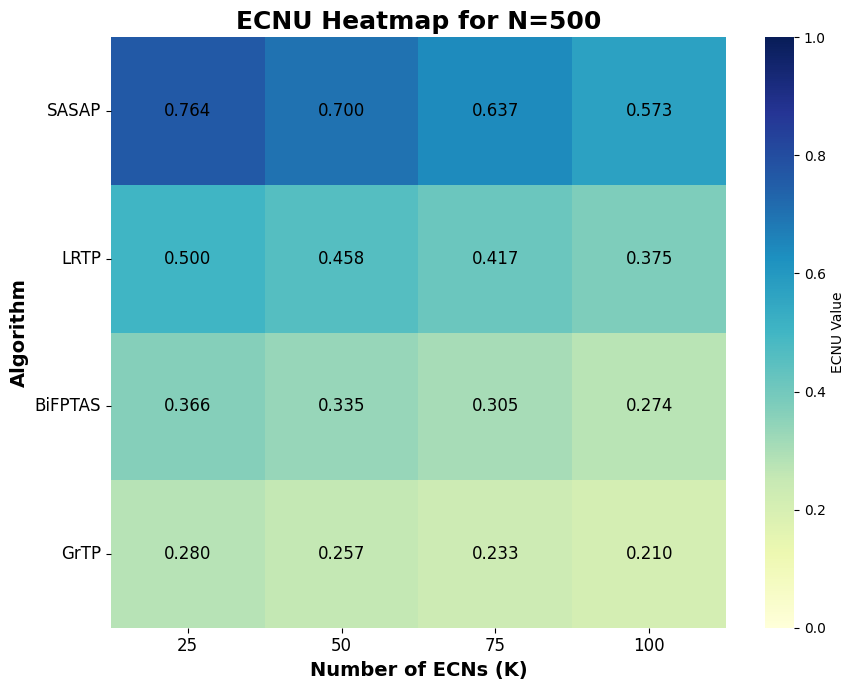

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Algorithms and ECN counts
algorithms = ['SASAP', 'LRTP', 'BiFPTAS', 'GrTP']
ecn_counts = [25, 50, 75, 100]
Ns = ['N=100', 'N=300', 'N=500']

# ECNU values for each N
base_ecnu = {
    'N=100': [0.636, 0.578, 0.492, 0.309],   # SASAP, LRTP, BiFPTAS, GrTP
    'N=300': [0.649, 0.560, 0.306, 0.280],
    'N=500': [0.764, 0.500, 0.366, 0.280]
}

# Heatmap for each 'n' and each 'k'
heatmap_data = {}

for N in Ns:
    base_values = base_ecnu[N]
    data = []
    for k in ecn_counts:
        factor = 1 - ((k - 25) / 300)  # Normalized: Decreases when K increases
        adjusted = [round(val * factor, 3) for val in base_values]
        data.append(adjusted)
    heatmap_data[N] = np.array(data).T  # Transpose: Algorithms on Y-axis

# Heatmaps for each N
for N in Ns:
    plt.figure(figsize=(9, 7))
    ax = sns.heatmap(
        heatmap_data[N],
        annot=True,
        fmt=".3f",
        cmap="YlGnBu",
        xticklabels=ecn_counts,
        yticklabels=algorithms,
        vmin=0,
        vmax=1,
        cbar_kws={'label': 'ECNU Value'},
        annot_kws={"fontsize": 12, "color": "black"}
    )

    # Adjusting tick parameters for better visibility
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, color='black')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, color='black', rotation=0)

    plt.title(f'ECNU Heatmap for {N}', fontsize=18, weight='bold')
    plt.xlabel('Number of ECNs (K)', fontsize=14, weight='bold')
    plt.ylabel('Algorithm', fontsize=14, weight='bold')
    plt.tight_layout()
    plt.show()
